In [ ]:
!pip install opencv-python

In [185]:
import os
import pathlib
import math
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import glob

from glob import glob
# from openslide import OpenSlide
from PIL import Image

import PIL
from PIL import Image
import json
import glob
import sklearn
import cv2
import seaborn as sns
import sys
import pandas as pd

from glob import glob
from pprint import pprint
from collections import defaultdict
import gc

import tensorflow as tf
from keras_preprocessing.image import load_img
from keras.layers import (Dense, Flatten, Dropout)
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings(action='ignore')

In [186]:
from skimage import io 
import imageio

In [187]:
sliced_train_images_real = glob("real_vs_fake/real-vs-fake/train/real/*")
sliced_train_images_fake = glob("real_vs_fake/real-vs-fake/train/fake/*")

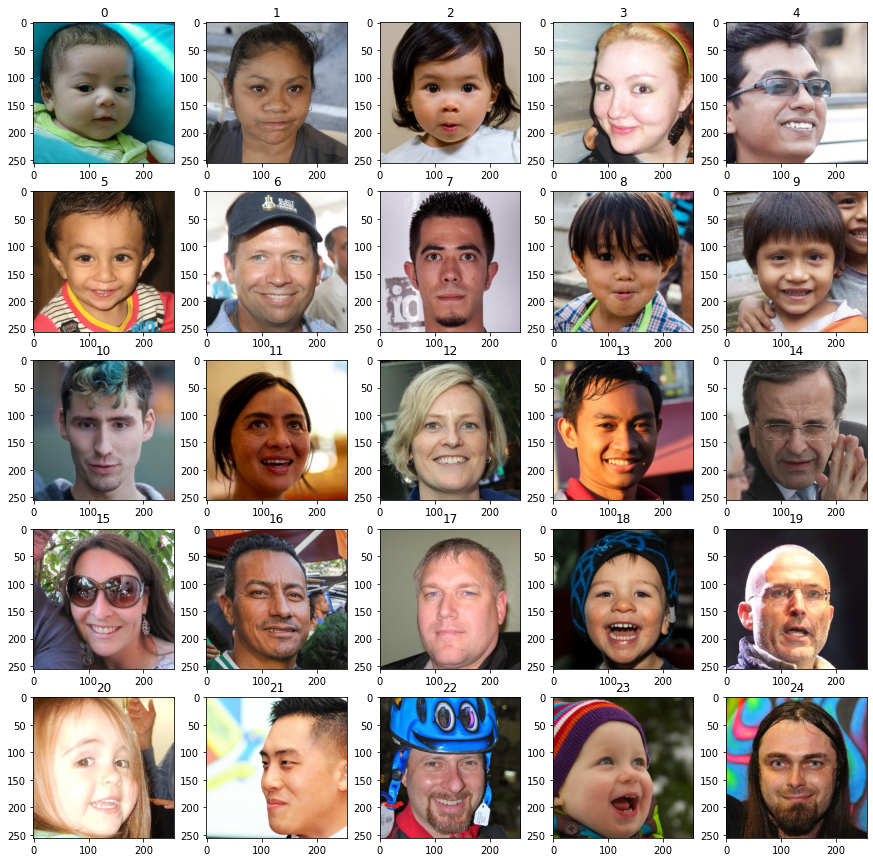

In [188]:
fig, axes = plt.subplots(5,5, figsize=(15,15))
for i, ax in enumerate(axes.flat):
    img = io.imread(sliced_train_images_real[i])
    ax.imshow(img); ax.set_title(i)

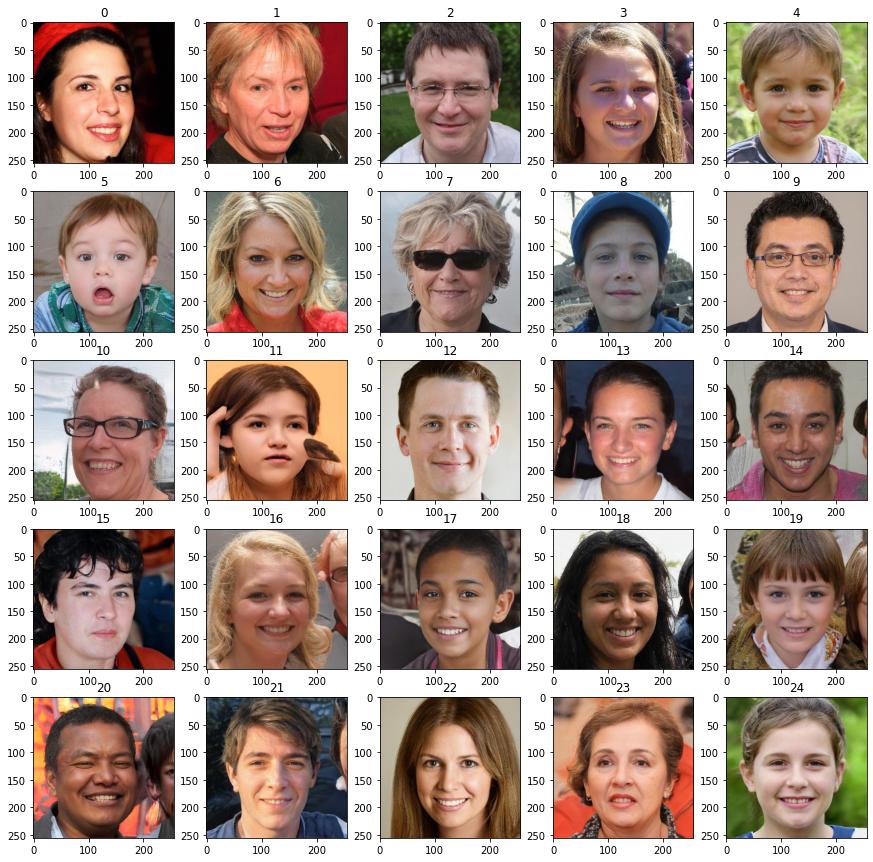

In [189]:
fig, axes = plt.subplots(5,5, figsize=(15,15))
for i, ax in enumerate(axes.flat):
    img = io.imread(sliced_train_images_fake[i])
    ax.imshow(img); ax.set_title(i)

In [432]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [473]:
channels = ['Red', 'Green', 'Blue']

# img_real_ids = [1, 2, 3, 4, 11, 12, 14]
img_real_ids = np.arange(0,50000)
# img_fake_ids = [0, 3, 5, 6, 7, 8]
img_fake_ids = np.arange(0,50000)

In [474]:
imgs_real = []
imgs_fake = []

for i in img_real_ids:
    imgs_real.append(io.imread(sliced_train_images_real[i]))
    
for i in img_fake_ids:
    imgs_fake.append(io.imread(sliced_train_images_fake[i]))

imgs_real[0].shape, imgs_fake[0].shape

((256, 256, 3), (256, 256, 3))

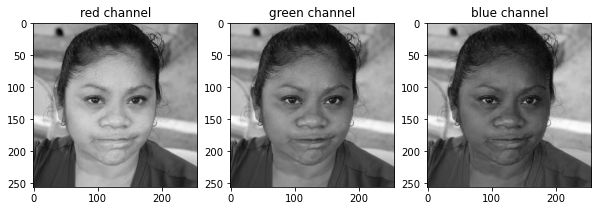

In [362]:
fig, ax = plt.subplots(1,3, figsize=(10,10))
channels = ['red', 'green', 'blue']
for i, ax in enumerate(ax):
    ax.imshow(imgs_real[0][:,:,i], cmap='gray')
    ax.set_title(channels[i]+' channel')
plt.show()

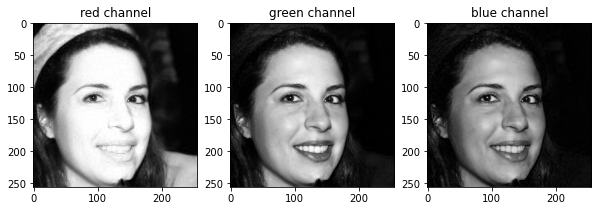

In [363]:
fig, ax = plt.subplots(1,3, figsize=(10,10))
channels = ['red', 'green', 'blue']
for i, ax in enumerate(ax):
    ax.imshow(imgs_fake[0][:,:,i], cmap='gray')
    ax.set_title(channels[i]+' channel')
plt.show()

- Each image contains one channel now hence it can only be represented using gray sccale. 
- How to judge?: Compare each image with the original image. 
- The regions containing red colour in the original image are lighter in the red channel image. This simply means that, regions which contribute more to the red colour of the original image are lighter in the grayscale image of the red channel. And the regions which contribute less or do not contribute are dark.

In [364]:
imgs_fake[0][:,:,2]

array([[12,  7,  4, ...,  6,  9, 11],
       [10,  5,  4, ...,  5,  7,  8],
       [ 4,  2,  2, ...,  4,  4,  5],
       ...,
       [ 2,  6,  4, ..., 10,  6,  8],
       [ 6,  3,  1, ...,  3, 10, 10],
       [ 3,  4,  4, ...,  7,  4,  8]], dtype=uint8)

In [ ]:
# Trying to find the density difference in RGB channels for Real and Fake Images (Using single example) 

In [178]:
img_real = imgs_real[0]
img_fake = imgs_fake[0]

img_real_channels = [img_real[0], img_real[1], img_real[2]]
img_fake_channels = [img_fake[0], img_fake[1], img_fake[2]]

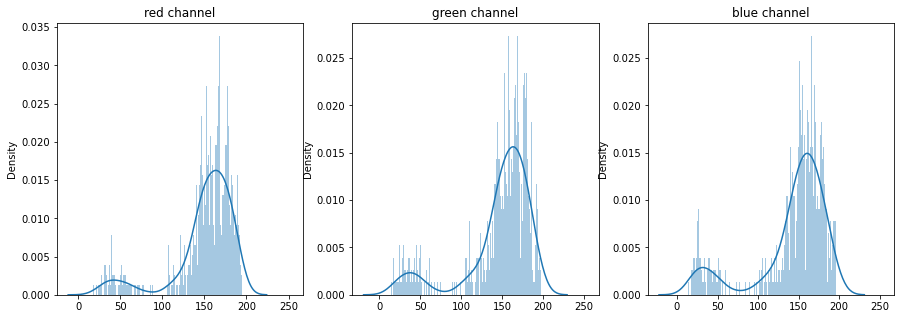

In [179]:
# real face image analysis
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i, ax in enumerate(ax):
    df = img_real_channels[i].ravel()
    sns.distplot(df, bins=np.arange(0,255), ax=ax)
    ax.set_title(channels[i]+' channel')
plt.show()

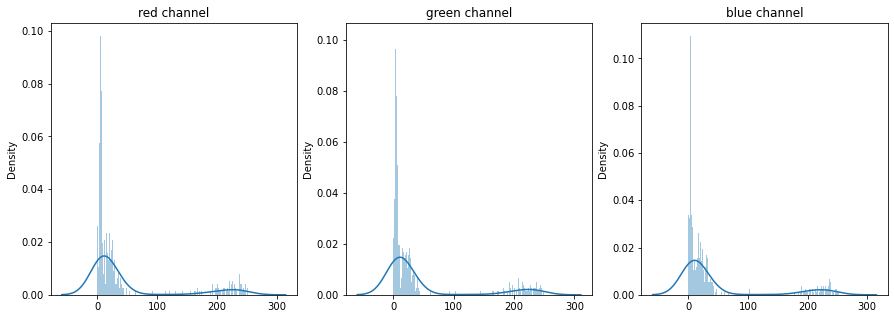

In [180]:
# fake face image analysis
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i, ax in enumerate(ax):
    df = img_fake_channels[i].ravel()
    sns.distplot(df, bins=np.arange(0,255), ax=ax)
    ax.set_title(channels[i]+' channel')
plt.show()

In [422]:
img_real.shape

(256, 256, 3)

In [181]:
# Histogram

Text(0, 0.5, 'Pixel count')

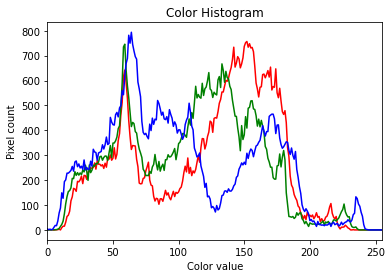

In [182]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 255])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        img_real[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

Text(0, 0.5, 'Pixel count')

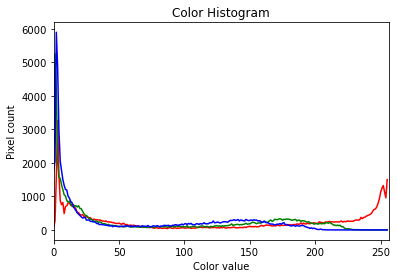

In [183]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        img_fake[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

Conclusion: Can't conclude anything with one image

In [506]:
# Things that we can try:

#### Grayscale conversion:
- Reduce computation complexity as it reduces the number of pixels in an image

#### Normalization/Data Rescaling:
- Projecting image data pixels (intensity) to a predefined range (usually (0,1) or (-1, 1)). 
- This is commonly used on different data formats.
- Allows all images to contribute equally to the total loss rather than when 
  other images have high and low pixels ranges give strong and weak loss, respectively
- High pixel images require a low learning rate and low pixel images high learning rate,
  re-scaling helps provide a standard learning rate for all images

#### Data Augmentation:
- Making minor alterations to existing data to increase its diversity without collecting new data.
- Used for enlarging a dataset. Standard data augmentation techniques include horizontal & vertical flipping, rotation, cropping, shearing, etc.

## RGB Analysis:

In [226]:
# Trying to find mean values of rgb channels in stacked images:

In [388]:
def print_single_image_summary(image, labels):
    
    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis] #elipsis notation
        
    for i, lab in enumerate(labels):
        # print("Values", image[:,:,i])
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')
        # min_val = np.min(image[:,:,:,i])
        # max_val = np.max(image[:,:,:,i])
        # mean_val = np.mean(image[:,:,i])
        # print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}, mean={mean_val:.4f}')

In [390]:
print_single_image_summary(imgs_real[1], ['R', 'G', 'B'])

--------------
Image Details:
--------------
Image dimensions: (256, 256, 3)
Channels:
R : min=0.0000, max=255.0000
G : min=0.0000, max=253.0000
B : min=0.0000, max=255.0000


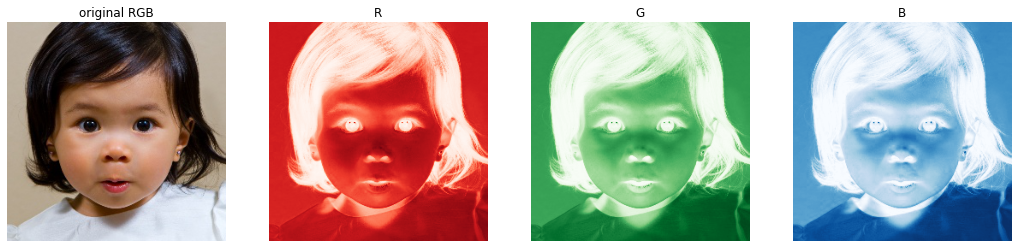

In [367]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(imgs_real[1]) 
ax[0].axis('off')
ax[0].set_title('original RGB')
for i, cmap in enumerate(['Reds','Greens','Blues']):
    ax[i+1].imshow(imgs_real[1][:,:,i], cmap=cmap) 
    ax[i+1].axis('off')
    ax[i+1].set_title(cmap[0])
plt.show()

In [ ]:
# POC for 1 image

In [507]:
def print_stack_image_summary(image, labels):
    
    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis] #elipsis notation
        
    for i, lab in enumerate(labels):
        # print("Values", image[:,:,i])
        # min_val = np.min(image[:,:,i])
        # max_val = np.max(image[:,:,i])
        # print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')
        min_val = np.min(image[:,:,:,i])
        # print("sum : ", np.sum(image[:,:,:,i])/256)
        max_val = np.max(image[:,:,:,i])
        mean_val = np.mean(image[:,:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}, mean={mean_val:.4f}')

In [376]:
img_real_ids_list = range(1,2)
img_fake_ids_list = range(1,2)

imgs_real_list=[]
imgs_fake_list=[]

for i in img_real_ids_list:
    imgs_real_list.append(io.imread(sliced_train_images_real[i]))
    
for i in img_fake_ids_list:
    imgs_fake_list.append(io.imread(sliced_train_images_fake[i]))

In [377]:
stk_img_real = np.stack((imgs_real_list), axis=0)

In [380]:
print_stack_image_summary(stk_img_real, ['R'])

--------------
Image Details:
--------------
Image dimensions: (1, 256, 256, 3)
Channels:
R : min=7.0000, max=233.0000, mean=121.2168


In [304]:
stk_img_fake = np.stack((imgs_fake_list), axis=0)

In [305]:
print_stack_image_summary(stk_img_fake, ['R','G','B'])

--------------
Image Details:
--------------
Image dimensions: (1, 256, 256, 3)
Channels:
R : min=0.0000, max=255.0000, mean=161.0617
G : min=0.0000, max=244.0000, mean=88.7507
B : min=0.0000, max=233.0000, mean=70.4454


In [505]:
# len(imgs_real)

#### A Comparative Study Using RGB Analysis

In [475]:
def calc_stack_image_single_channel_mean(image_list, label):
    print('--------------')
    print('Image Details:')
    print('--------------')
    print("Number of images to be stacked: ", len(image_list)) 
    print('--------------')
    print("Color channel : ", label)
    
    label_map = {0:'Red', 1:'Green', 2:'Blue'}
    
    # To hold red channel image
    single_channel_img = np.zeros((256,256,1))
    
    # To hold list of red channel images corresponding to each image in the list 'image_list'
    single_channel_img_list = []
    
    for img in image_list:
        # print(img.shape)
        # 0 is for Red channel
        # 1 is for Green channel
        # 2 is for Blue channel
        single_channel_img = img[:,:,label]
        single_channel_img_list.append(single_channel_img)
    
    # print(red_img_list)
    # Stack all single channel images together to calculate mean of corresponding pixel values
    single_channel_img_stack = np.stack(single_channel_img_list)
    # print(single_channel_img_stack.shape)
    single_channel_mean_img = np.mean(single_channel_img_stack, axis = 0)
    # print(f'{label_map[label]} pixel mean intensity image : , {single_channel_mean_img}')
    return single_channel_mean_img
        
  
    
    
    

In [477]:
# for real images:
n_sample = 50000
red_channel_mean_img_real = calc_stack_image_single_channel_mean(imgs_real[0:n_sample], 0)  
green_channel_mean_img_real = calc_stack_image_single_channel_mean(imgs_real[0:n_sample], 1)  
blue_channel_mean_img_real = calc_stack_image_single_channel_mean(imgs_real[0:n_sample], 2)  

all_channel_mean_img_real = np.stack([red_channel_mean_img_real, green_channel_mean_img_real, blue_channel_mean_img_real])

all_channel_mean_img_real.shape

--------------
Image Details:
--------------
Number of images to be stacked:  50000
--------------
Color channel :  0
--------------
Image Details:
--------------
Number of images to be stacked:  50000
--------------
Color channel :  1
--------------
Image Details:
--------------
Number of images to be stacked:  50000
--------------
Color channel :  2


(3, 256, 256)

Text(0, 0.5, 'Pixel count')

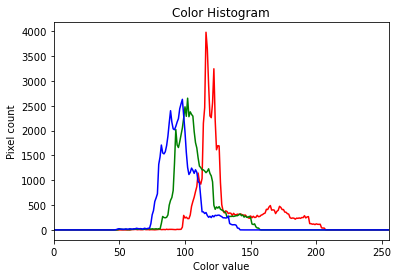

In [478]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 255])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        all_channel_mean_img_real[channel_id, :, :], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

In [482]:
# for Fake:
n_sample = 50000
red_channel_mean_img_fake = calc_stack_image_single_channel_mean(imgs_fake[0:n_sample], 0)  
green_channel_mean_img_fake = calc_stack_image_single_channel_mean(imgs_fake[0:n_sample], 1)  
blue_channel_mean_img_fake = calc_stack_image_single_channel_mean(imgs_fake[0:n_sample], 2)  

all_channel_mean_img_fake = np.stack([red_channel_mean_img_fake, green_channel_mean_img_fake, blue_channel_mean_img_fake])

all_channel_mean_img_fake.shape

--------------
Image Details:
--------------
Number of images to be stacked:  50000
--------------
Color channel :  0
--------------
Image Details:
--------------
Number of images to be stacked:  50000
--------------
Color channel :  1
--------------
Image Details:
--------------
Number of images to be stacked:  50000
--------------
Color channel :  2


(3, 256, 256)

Text(0, 0.5, 'Pixel count')

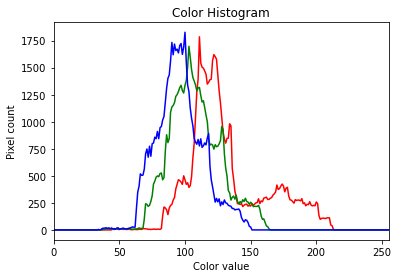

In [483]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 255])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        all_channel_mean_img_fake[channel_id, :, :], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

Text(0.5, 0.98, 'Comparison of Mean Contribution of RGB Channels in Real and Fake Images')

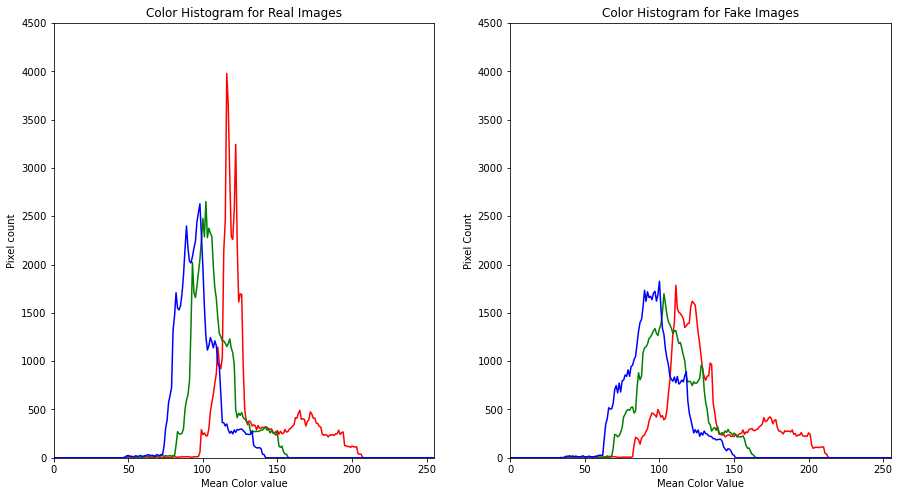

In [504]:
# Plotting together:

colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for each color
plt.figure(figsize = [15, 8])

plt.subplot(1, 2, 1)
plt.ylim([0, 4500])
plt.xlim([0, 255])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        all_channel_mean_img_real[channel_id, :, :], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)
plt.title("Color Histogram for Real Images")
plt.xlabel("Mean Color value")
plt.ylabel("Pixel count")
    
plt.subplot(1, 2, 2)
plt.ylim([0, 4500])
plt.xlim([0, 255])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        all_channel_mean_img_fake[channel_id, :, :], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)



plt.title("Color Histogram for Fake Images")
plt.xlabel("Mean Color Value")
plt.ylabel("Pixel Count")
fig.suptitle('Comparison of Mean Contribution of RGB Channels in Real and Fake Images', fontsize=16)




